<a><img style="float: right;" src="https://i.ibb.co/1qVSNwH/FP.png" alt="FP" border="0"></a>

In [1]:
%matplotlib inline

# importing libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import cufflinks as cf
import seaborn as sns
import pandas as pd
import numpy as np
import quandl
import plotly
import time

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Markdown, display
from matplotlib.ticker import FuncFormatter
from pandas.core.base import PandasObject
from datetime import datetime

# Setting pandas dataframe display options
pd.set_option("display.max_rows", 20)
pd.set_option('display.width', 800)
pd.set_option('max_colwidth', 800)

pd.options.display.float_format = '{:,.2f}'.format

# Set plotly offline
init_notebook_mode(connected=True)

# Set matplotlib style
plt.style.use('seaborn')

# Set cufflinks offline
cf.go_offline()

# Defining today's Date
from datetime import date
today = date.today()

In [3]:
import FutureAnalyser as fa

# Comparação entre Carteiras Index e Blackrocks

#### Fundos Blackrock

- BSF Managed Index Port Defesv A2 EUR - Fundo [de ETFs] misto conservador - [Banco Invest](https://www.bancoinvest.pt/poupanca-e-investimento/investimento/fundos-de-investimento/detalhe-fundo-de-investimento?isin=LU1241524617) // [Morningstar](https://www.morningstar.pt/pt/funds/snapshot/snapshot.aspx?id=F00000VYLS) // [site oficial](https://www.blackrock.com/pt/products/275521/bsf-managed-index-portfolio-defensive-class-a2rf-eur)
- BSF Managed Index Port Mod A2 EUR - Fundo [de ETFs] misto moderado - [Banco Invest](https://www.bancoinvest.pt/poupanca-e-investimento/investimento/fundos-de-investimento/detalhe-fundo-de-investimento?isin=LU1241524708) // [Morningstar](https://www.morningstar.pt/pt/funds/snapshot/snapshot.aspx?id=F00000VYLT) // [site oficial](https://www.blackrock.com/pt/products/275523/blackrock-managed-index-portfolio-moderate-a2rf-eur-fund)
- BSF Managed Index Port Growth A2 EUR - Fundo [de ETFs] misto dinâmico - [Banco Invest](https://www.bancoinvest.pt/poupanca-e-investimento/investimento/fundos-de-investimento/detalhe-fundo-de-investimento?isin=LU1241524880) // [Morningstar](https://www.morningstar.pt/pt/funds/snapshot/snapshot.aspx?id=F00000VYLU) // [site oficial](https://www.blackrock.com/americas-offshore/products/275522/blackrock-managed-index-portfolios-growth-fund)

ETFs/Index Funds

- IWDA - ETF tracker do MSCI World - [Morningstar](https://www.morningstar.pt/pt/etf/snapshot/snapshot.aspx?id=0P0000MLIH) //  [site oficial em português de versão comparável](https://www.blackrock.com/pt/products/251882/)
- IQQ0 - ETF tracker do MSCI World Minimum Volatility - [Morningstar](https://www.morningstar.pt/pt/etf/snapshot/snapshot.aspx?id=0P0000Y2A1) // [site oficial em português de versão comparável](https://www.blackrock.com/pt/products/251382/)
- Vanguard Global Bond Index Inv EURH Acc - Fundo índice tracker do Bloomberg Barclays Global Aggregate Bond Index- [Morningstar](IE00BGCZ0933) // [site oficial](https://global.vanguard.com/portal/site/kiids/pt/en/documents)// [KIID](https://global.vanguard.com/portal/site/loadPDF?country=pt&docId=10417) // [Factsheet](https://global.vanguard.com/portal/site/loadPDF?country=pt&docId=13309)

#### Carteiras ETFs

- Conservadora
    - 70% Vanguard Global Bond // 15% IWDA // 15% IQQ0
- Moderada
    - 50% Vanguard Global Bond // 25% IWDA // 25% IQQ0
- Dinâmica
    - 20% Vanguard Global Bond // 40% IWDA // 40% IQQ0

**Nota**: As carteiras de ETFs/Index Funds incluem 0.2% por transacção + 1% anual de consultoria para investimento.

In [29]:
# Downloading funds and creating quotes and returns dataframes
ISINs = ['IE00BGCZ0933', 'IWDA', 'IQQ0', 'LU1241524617', 'LU1241524708', 'LU1241524880']
Nomes = ['VG_GB'       , 'IWDA', 'IQQ0', 'BR_Def'        , 'BR_Mod'        , 'BR_Grow']

fundos = pd.read_csv('C:/Users/Luis/Google Drive/_GitHub/Carteiras_Clientes/Cotacoes_diarias_all.csv', index_col = 'Date', parse_dates = True)[ISINs]

fundos.columns = Nomes
fundos = fundos.dropna()

In [30]:
#### Normalization to 100 ####
fundos = fa.compute_growth_rate(fundos)

In [31]:
Begin = fundos.head(1).index
Begin = str(Begin.strftime('%Y-%m-%d'))[8:18]

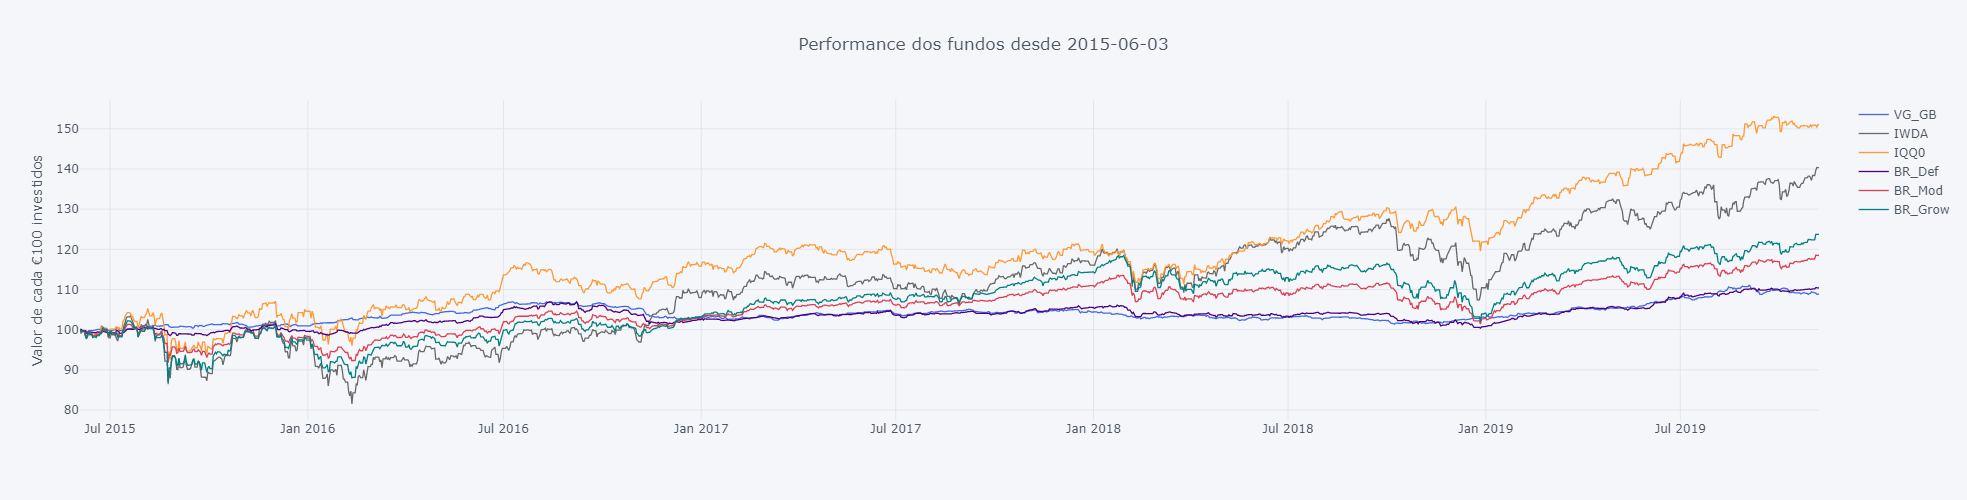

In [32]:
round(fundos, 2).iplot(dimensions=fa.dimensions, colors=fa.colors, title='Performance dos fundos desde ' + Begin, yTitle='Valor de cada €100 investidos' )

**Dica:** A interactividade dos gráficos da plotly permite:

    . Zoom (mantenham o clique e arrastem o cursor em simultâneo, em cima do gráfico);
    . Tem uma lista de opções que aparece se forem com o cursor ao canto superior direito;
    . Façam duplo clique no gráfico ou seleccionem a opção Autoscale/Reset Axes para voltar ao normal;
    . Alterem a opção de 'Compare data on hoover' para 'Show closest data on hoover' se vos for mais conveniente;
    . Se clicarem num nome na legenda esse fundo desaparece (clicando de novo ele volta a apetecer).

In [33]:
Portfolios = fa.compute_portfolio(fundos, [0.7, 0.15, 0.15, 0, 0, 0], Nomes=Nomes)
Portfolios.columns = ['Conservador']

Portfolios['Moderado'] = fa.compute_portfolio(fundos, [0.50, 0.25, 0.25, 0, 0, 0], Nomes=Nomes)
Portfolios['Dinâmico'] = fa.compute_portfolio(fundos, [0.20, 0.40, 0.40, 0, 0, 0], Nomes=Nomes)

Portfolios['BR_Def']  = fundos['BR_Def'].copy()
Portfolios['BR_Mod']  = fundos['BR_Mod'].copy()
Portfolios['BR_Grow'] = fundos['BR_Grow'].copy()

In [34]:
pd.options.display.float_format = '{:,.2f}€'.format

fa.preview(Portfolios)

,Conservador,Moderado,Dinâmico,BR_Def,BR_Mod,BR_Grow
2015-06-03,100.00€,100.00€,100.00€,100.00€,100.00€,100.00€
2015-06-04,99.82€,99.62€,99.32€,100.02€,99.64€,99.35€
2015-06-05,99.78€,99.74€,99.69€,99.77€,99.60€,99.48€
2019-11-05,119.17€,126.39€,137.68€,110.38€,118.50€,123.71€
2019-11-06,119.30€,126.57€,137.93€,110.36€,118.44€,123.69€
2019-11-07,119.30€,126.57€,137.93€,110.36€,118.44€,123.69€


In [ ]:
DD = compute_drawdowns(fundos)
DD = DD /100

layout = go.Layout(
    title='Drawdown dos portfolios desde ' + Begin,
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    width=990,
    height=500,
    xaxis=dict(
        title='',
        showgrid=True,
        titlefont=dict(size=12),
    ),
    yaxis=dict(
        title='',
        showgrid=True,
        zeroline=True, # Adicionar ou não a zero line
        tickformat=".1%", # tickformat=".2%" se quiseres mais casas decimais
    ))

trace0 = go.Scatter(
    x = DD.index,
    y = DD.iloc[:, 0],
    name = 'IQQ0',
    line = dict(
        color = 'royalblue',
        width = 1.3)
)

trace1 = go.Scatter(
    x = DD.index,
    y = DD.iloc[:, 1],
    name = 'SC0J',
    line = dict(
        color = 'dimgrey',
        width = 1.3)
)

data = [trace0, trace1]
        
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
print_title('Drawdown actual (' + str(today) + ')')
DD = compute_drawdowns(fundos)
DD = DD /100
round(DD.tail(1), 5).applymap(lambda x: "{0:.2f}%".format(x*100))

No gráfico acima podemos visualizar os drawdowns de ambos os ETFs. Reparamos que para drawdowns pequenos (abaixo de 10%) as quedas são semelhantes, mas em momentos extremos em que os drawdowns chegam aos dois dígitos é onde o IQQ0 demonstra as suas vantagens. Podemos ver isso na quebra do início de 2016 onde o SC0J teve uma quebra de 22.5% face aos máximos enquanto o IQQ0 apenas 10.5%. Isso repete-se de forma muito semelhante na queda do último trimestre de 2018.

In [ ]:
layout = go.Layout(
    title='Diferencial de performance entre os ETFs desde ' + Begin,
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    width=990,
    height=500,
    xaxis=dict(
        title='<b>Nota:</b> Subida a favor de IQQ0, descida a favor de SC0J',
        showgrid=True,
        titlefont=dict(size=12),
    ),
    yaxis=dict(
        title='',
        showgrid=True,
        zeroline=True, # Adicionar ou não a zero line
        tickformat=".1%" # tickformat=".2%" se quiseres mais casas decimais
    ))

trace0 = go.Scatter(
    x = fundos.index,
    y = (round(((fundos.iloc[:, 0]/fundos.iloc[:, 1])- 1), 5)),
    name = 'Portfolio',
    line = dict(
        color = 'darkorchid',
        width = 1.3)
)

data = [trace0]
        
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Este gráfico apresenta a diferença relativa (ao invés da absoluta) entre ambos os ETFs. Como já vimos acima a maior diferença entre os ETFs aconteceu no início de 2016, devido a uma grande diferença na dimensão do drawdown. Isso foi normalizado entre meados de 2016 e início de 2018.

In [ ]:
print_title('Performance dos fundos desde ' + Begin)
compute_performance_table(fundos)

In [ ]:
print_title('Performance a 12 meses')
fundos_1 = filter_by_date(fundos, years=1)
compute_performance_table(fundos_1)

Este diferencial de performance a 12 meses deve-se principalmente à menor quebra do IQQ0 no final de 2018.

In [ ]:
print_title('Performance a 3 anos')
fundos_3 = filter_by_date(fundos, years=3)
compute_performance_table(fundos_3)

In [ ]:
print_title('Performance a 5 anos')
fundos_5 = filter_by_date(fundos, years=5)
compute_performance_table(fundos_5)

- **CAGR:** Retorno geométrico anualizado do portfolio;
- **StdDev:** Desvio padrão anualizado do portfolio (quanto mais alto mais risco tem a carteira);
- **Sharpe:** CAGR/StdDev (quanto mais alto melhor);
- **Max DD:** Maior queda do portfolio;
- **MAR:** CAGR/Max DD (quanto mais alto melhor).

In [ ]:
fundos_norm = fundos.copy()

# Resampling to yearly (business year)
yearly_quotes_fundos = fundos_norm.resample('BA').last()

# Adding first quote (only if start is in the middle of the year) ### Falta trabalho para automatizar #####
yearly_quotes_fundos = pd.concat([yearly_quotes_fundos.iloc[:1], yearly_quotes_fundos])
yearly_quotes_fundos = pd.concat([pd.DataFrame(fundos_norm.iloc[0]).transpose(), yearly_quotes_fundos.iloc[1:]])

# Returns
yearly_returns_fundos = ((yearly_quotes_fundos / yearly_quotes_fundos.shift(1)) - 1) * 100
yearly_returns_fundos = yearly_returns_fundos.set_index([list(range(fundos_norm.index[0].year - 1, fundos_norm.index[-1].year + 1))]).drop(fundos_norm.index[0].year - 1)

# Calcular em valores percentuais
yearly_returns_fundos = yearly_returns_fundos / 100

# Sns heatmap
fig, ax = plt.subplots()
fig.set_size_inches(10,2.5)

ax = sns.heatmap(yearly_returns_fundos.transpose(), annot=True, cmap="RdYlGn", linewidths=.2, cbar=False, center=0.02, fmt='.2%')
plt.yticks(rotation=360)
plt.title('Yearly performance by asset')
plt.show()

In [ ]:
print_title('Drawdown Table de ' + fundos.iloc[:, 0].name)
compute_drawdowns_table(fundos.iloc[:, 0])

In [ ]:
print_title('Drawdown Table de ' + fundos.iloc[:, 1].name)
compute_drawdowns_table(pd.DataFrame(fundos.iloc[:, 1]))

Outra grande diferença entre o IQQ0 e o MSCI World também pode ser vista aqui. Enquanto o SC0J apenas teve um drawdown de grande extensão (neste caso 1 ano e 7 meses) o SC0J apresenta dois drawdowns de alguma extensão, um de um ano e outro de 1 ano e 2 meses. Ou seja, embora historicamente menos profundos o IQQ0 não é estranho a drawdowns com períodos superiores a um ano. Chamo a atenção para o facto de ele ter feito um máximo em 4 de Dezembro de 2018 (e ter começado aí o drawdown de fim de 2018) ao contrário do SC0J que começou em 2018-10-03.

In [ ]:
# Turning daily quotes into monthly
Portfolio_M = fundos.resample('BM').last()
# Monthly returns
Portfolio_ret_M = Portfolio_M.pct_change()

In [ ]:
my_pal = ["royalblue", "orange", "dimgrey"]

ax = sns.swarmplot(data=Portfolio_ret_M, orient='v', linewidth=1,  palette=my_pal)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
ax.set_title("Swarmplot das rentabilidades mensais")
ax.set_xlabel('')
ax.set_ylabel('Variação')
plt.show()

Este gráfico apresenta um ponto por cada rentabilidade mensal. Podemos ver o quanto os valores negativos extremos são inferiores no IQQ0, com as duas piores rentabilidades a rondar os -6%, enquanto no SC0J ultrapassam os -8%. Podemos ver no quadro abaixo em que meses isso aconteceu.

In [ ]:
# Compute monthly returns table
nr = 0

plot(fundos.iloc[:, nr], title= 'Retornos mensais para ' + fundos.iloc[:, nr].name , figsize=(15, 8))

In [ ]:
# Compute monthly returns table
nr = 1

plot(fundos.iloc[:, nr], title= 'Retornos mensais para ' + fundos.iloc[:, nr].name , figsize=(15, 8))

In [ ]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Código ON/OFF</button>''', raw=True)

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from IPython.display import HTML

In [ ]:
def compute_growth_rate(VG_GB=0.33, SC0J=0.34, IQQ0=0.33, ytop=141, ybottom=85, start='2015-03-10', end=today):       
    pesos = list([VG_GB, SC0J, IQQ0])
    portfolio = compute_portfolio(fundos[start:end], pesos)
    
    layout = go.Layout(
    title='Performance do portfolio desde ' + str(portfolio.index[0])[0:10] + ' até ' + str(portfolio.index[-1])[0:10],
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    width=990,
    height=500,
    xaxis=dict(
        title='',
        showgrid=True,
        titlefont=dict(size=12),
    ),
    yaxis=dict(range=[ybottom, ytop])
    )
        
    portfolio.iplot(dimensions=dimensions, colors=colors, layout=layout)
    DD = compute_drawdowns(portfolio)
    DD = DD /100
    DD.iplot(dimensions=dimensions, colors='darkorange')
    display(HTML(compute_performance_table(portfolio).to_html()))
    
a = widgets.interactive(compute_growth_rate, 
                            VG_GB=(0, 1, .05), 
                            SC0J=(0, 1, .05),
                            IQQ0=(0, 1, .05),
                            ytop=(86, 152, 5),
                            start=widgets.DatePicker(description='Start Date', disabled=False),
                            end=widgets.DatePicker(description='End Date', disabled=False),
                           )

display(a)